<a href="https://colab.research.google.com/github/jumbokh/Computer-Vision/blob/main/notebooks/FaceRecogn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## https://koding.work/use-face-recognition-lib-to-do-face-recognition/

In [1]:
!pip install opencv-python numpy face-recognition pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=2d08531c916867b32e23681df25bbf5c328247e4a60f3e2df7c7bf4a4d92e9d1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
import cv2
import numpy as np
import face_recognition

In [3]:
known_face_list = [
    {
        'name': 'Jumbo Hsieh',
        'filename': 'jumbo.jpg',
        'encode': None,
    },
    {
        'name': 'Elon Musk',
        'filename': 'Elon-Musk.jpg',
        'encode': None,
    },
]

In [4]:
for data in known_face_list:
    img = cv2.imread(data['filename'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data['encode'] = face_recognition.face_encodings(img)[0]

In [ ]:
 print(known_face_list)

In [10]:
test_fn_list = ['jumbo-1.jpg','jumbo-2.jpg','jumbo-3.jpg']

In [11]:
known_face_encodes = [data['encode'] for data in known_face_list]

In [12]:
tolerance = 0.6

In [13]:
for fn in test_fn_list:
    img = cv2.imread(fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    cur_face_locs = face_recognition.face_locations(img)
    cur_face_encodes = face_recognition.face_encodings(img, cur_face_locs, model='large')

    for cur_face_encode in cur_face_encodes:
        face_distance_list = face_recognition.face_distance(known_face_encodes, cur_face_encode)

        min_distance_index = np.argmin(face_distance_list)
        if face_distance_list[min_distance_index] < tolerance:
            result = known_face_list[min_distance_index]['name']
        else:
            result = 'unknown'

        print(f'辨識檔案: {fn}, 辨識結果: {result}')

辨識檔案: jumbo-1.jpg, 辨識結果: Jumbo Hsieh
辨識檔案: jumbo-2.jpg, 辨識結果: Jumbo Hsieh
辨識檔案: jumbo-3.jpg, 辨識結果: Jumbo Hsieh


In [14]:
RED_COLOR = (200, 58, 76)
WHITE_COLOR = (255, 255, 255)

def draw_locations(img, match_results):
    for match_result in match_results:
        y1, x2, y2, x1 = match_result['location']
        cv2.rectangle(img, (x1, y1), (x2, y2), RED_COLOR, 2)
        cv2.rectangle(img, (x1, y2 + 35), (x2, y2), RED_COLOR, cv2.FILLED)
        cv2.putText(img, match_result['name'], (x1 + 10, y2 + 25), cv2.FONT_HERSHEY_COMPLEX, 0.8, WHITE_COLOR, 2)

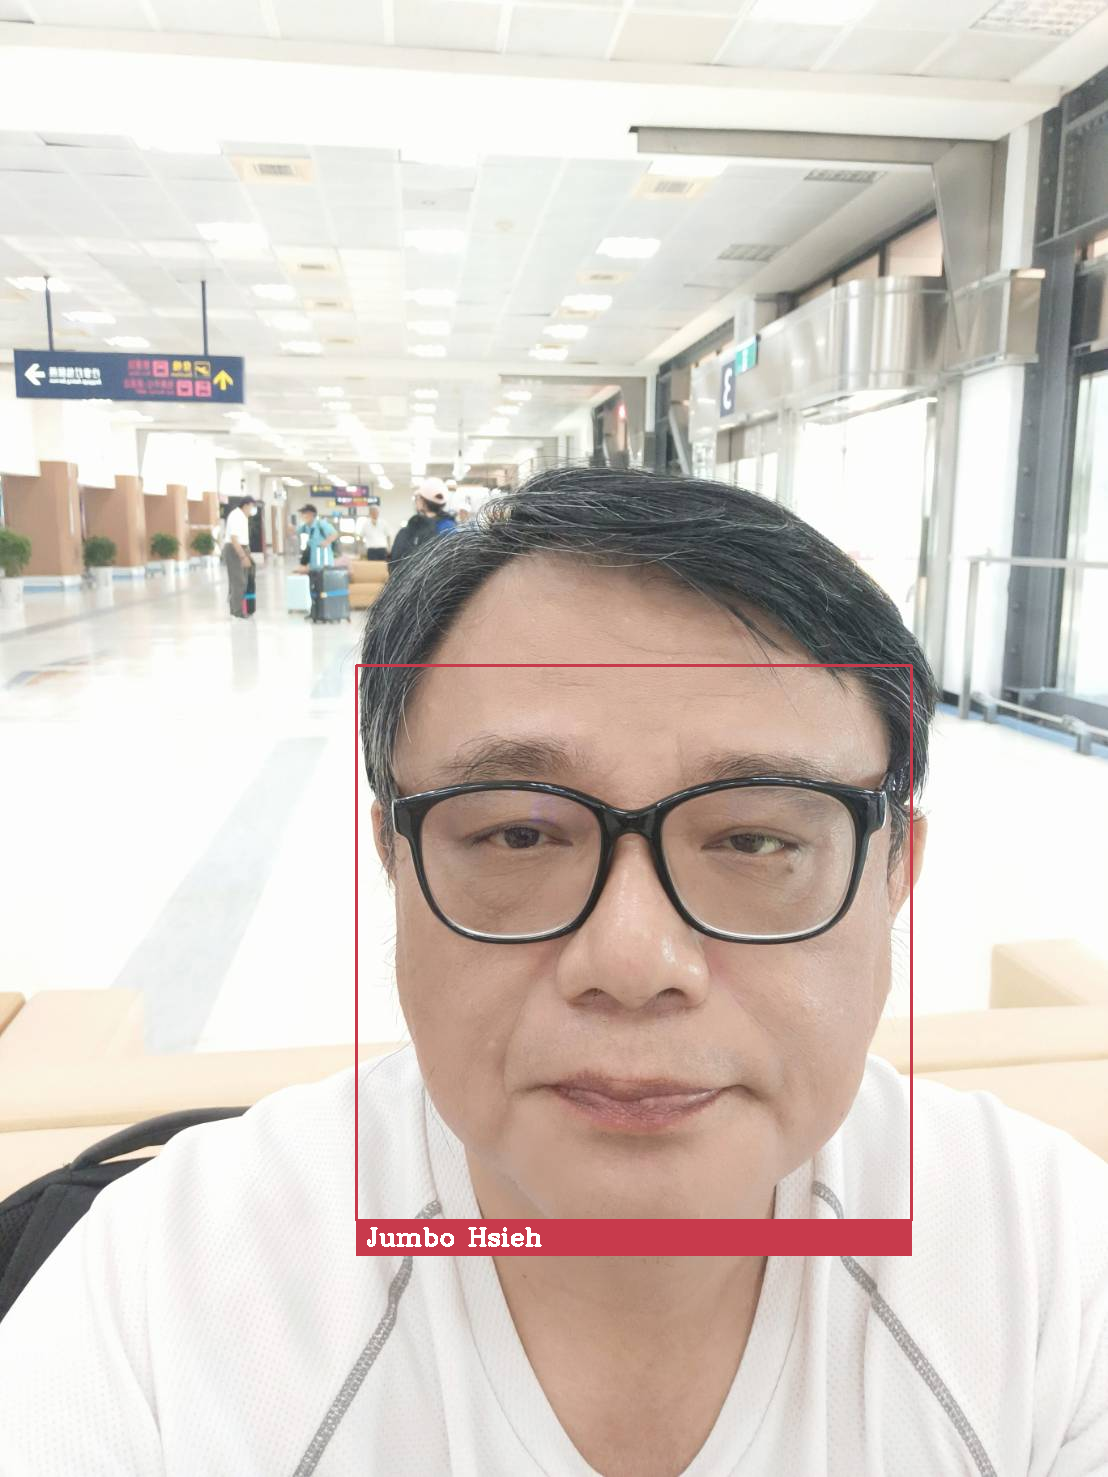

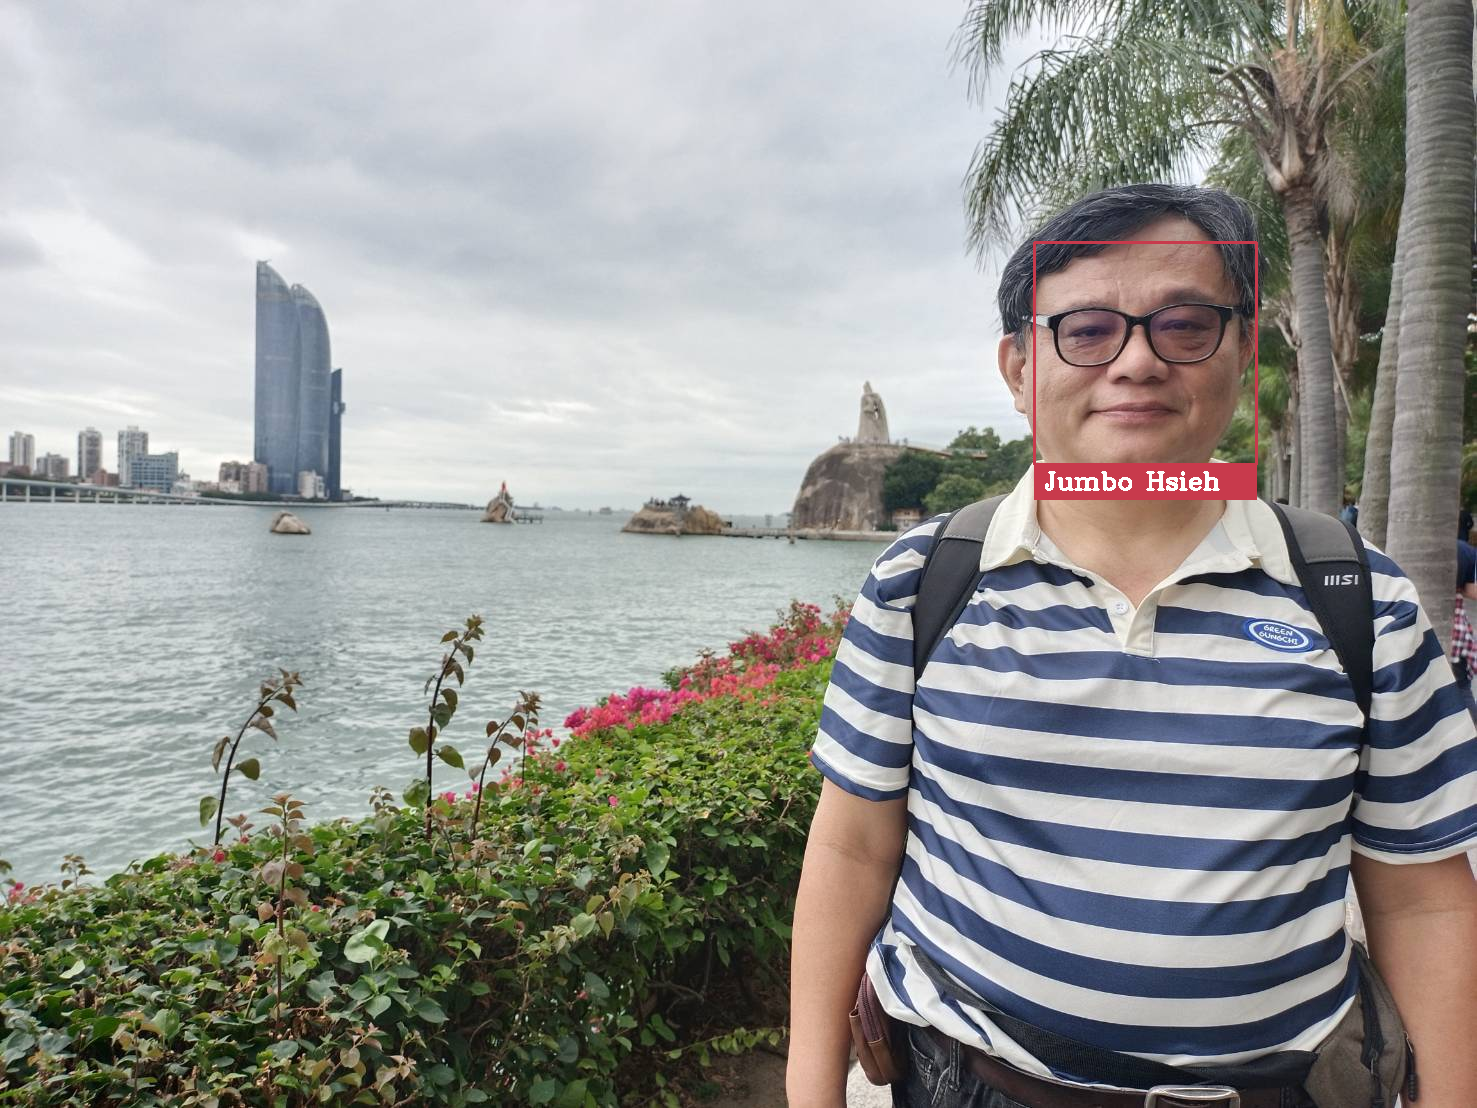

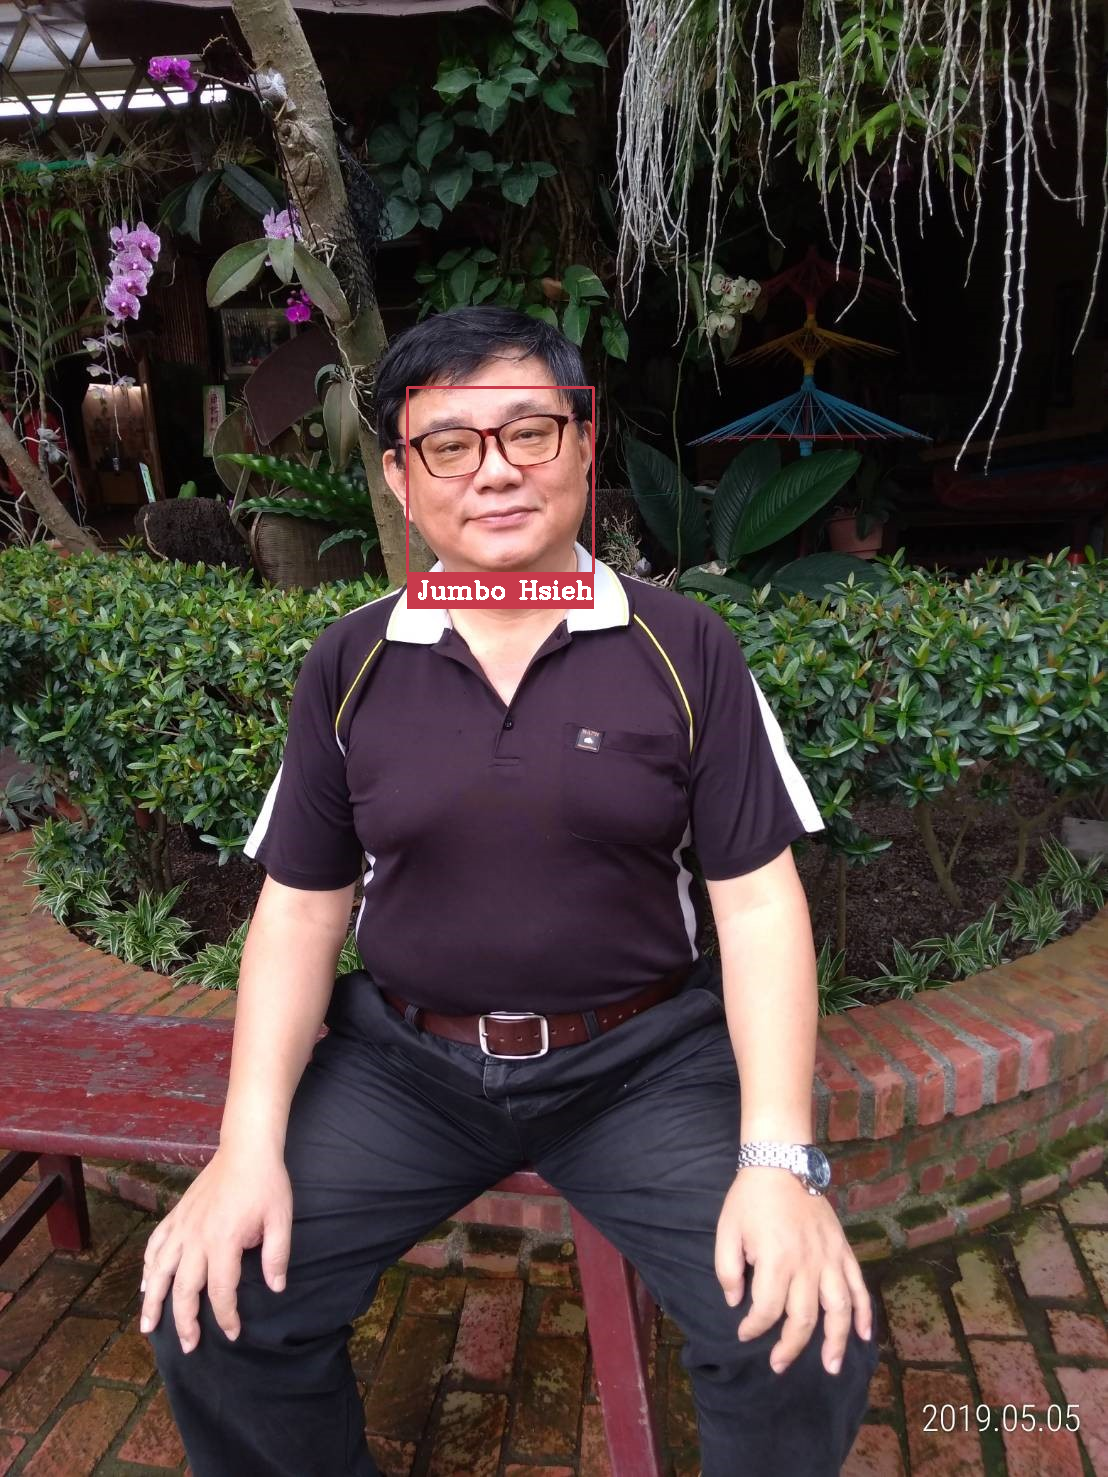

In [15]:
from IPython.display import display
from PIL import Image

for fn in test_fn_list:
    match_results = []

    img = cv2.imread(fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    cur_face_locs = face_recognition.face_locations(img)
    cur_face_encodes = face_recognition.face_encodings(img, cur_face_locs)

    for cur_face_encode, cur_face_loc in zip(cur_face_encodes, cur_face_locs):
        face_distance_list = face_recognition.face_distance(known_face_encodes, cur_face_encode)

        min_distance_index = np.argmin(face_distance_list)
        if face_distance_list[min_distance_index] < tolerance:
            name = known_face_list[min_distance_index]['name']
        else:
            name = 'unknown'

        match_results.append({
            'name': name,
            'location': cur_face_loc,
        })

    draw_locations(img, match_results)
    display(Image.fromarray(img))